In [13]:
import pandas as pd
import os
import yaml
from sentinelsat import SentinelAPI, geojson_to_wkt 
import osmnx as ox

In [14]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
from osgeo import gdal
import rasterio
from rasterio.plot import show_hist
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import box
from fiona.crs import from_epsg

In [15]:
from shapely.geometry import box

In [16]:
with open("auth.yaml", 'r') as ymlfile:
    auth = yaml.safe_load(ymlfile)

In [17]:
api = SentinelAPI(auth['copernicus_open_access_hub']['username'], 
                  auth['copernicus_open_access_hub']['password'],
                  'https://scihub.copernicus.eu/dhus')

In [18]:
# this is the place where I was born and grew up
# I chose to use the image from this place because it would be 
# easier to label the clusters since I am closely familiar with the area
place_name='Gelendzhik, Russia'

In [19]:
# will return either polygon or point (in GeodatFrame format) if boundaries of the place aren't available
place = ox.gdf_from_place(place_name)

In [20]:
place.crs

'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [21]:
query_box=box(minx=place.bbox_west.values[0],
    miny=place.bbox_south.values[0],
    maxx=place.bbox_east.values[0],
    maxy=place.bbox_north.values[0])

In [22]:
# 3-month period to search for scenes with less than 6% cloud coverage where bounding box of the area
# of interest is within the image (that is image contains the bounding box)
products = api.query(query_box.wkt,
                     area_relation='Contains',
                     date = ('20190601', '20190926'), 
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,5))


In [23]:
products_gdf = api.to_geodataframe(products)

In [24]:
if not products_gdf.empty:
    products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
else:
    print ('No records scences found for the filtered parameters')

In [25]:
products_gdf_sorted

title  \
a0355a57-a5eb-452d-a248-0bbdf44f463c  S2B_MSIL2A_20190916T082559_N0213_R021_T37TDK_2...   
f04131c5-10a4-4321-82db-9eb7c0a6bde1  S2B_MSIL2A_20190827T082609_N0213_R021_T37TDK_2...   
0806a7e1-325b-40fa-9ef1-813d82ea89c5  S2B_MSIL2A_20190903T081609_N0213_R121_T37TDK_2...   
c01a3c5c-5554-4015-b671-64ed4e9380a7  S2A_MSIL2A_20190901T082601_N0213_R021_T37TDK_2...   
c4cfd524-135d-4163-96c8-07a89d1ea907  S2A_MSIL2A_20190812T082611_N0213_R021_T37TDK_2...   
9c043c08-c656-437f-93e1-3f50ba9f5ec7  S2A_MSIL2A_20190809T081611_N0213_R121_T37TDK_2...   
27d23dea-d870-4967-9c0a-a65d3d785dce  S2B_MSIL2A_20190913T081609_N0213_R121_T37TDK_2...   
1e7d86e0-ceff-422b-944d-69808376bf2e  S2A_MSIL2A_20190829T081601_N0213_R121_T37TDK_2...   
0f5ece41-dd0c-44e0-9c60-8bdd91fddc91  S2B_MSIL2A_20190814T081609_N0213_R121_T37TDK_2...   
5fef4d3b-e0cc-4e59-b464-2781a2610a43  S2B_MSIL2A_20190618T082609_N0212_R021_T37TDK_2...   
16ed7b29-58cd-4606-9520-40f1052a99a6  S2A_MSIL2A_20190703T082611_N0212_R021_T37TDK_2...   
1349b563-55d3-4546-8ba3-b21d7cfcf899  S2A_MSIL2A_20190720T081611_N0213_R121_T37TDK_2...   
9f844f3c-562f-46fc-bb78-dde291a87596  S2B_MSIL2A_20190807T082609_N0213_R021_T37TDK_2...   
d9c869c0-c958-44dd-b217-31bc1e4419f8  S2B_MSIL2A_20190708T082609_N0213_R021_T37TDK_2...   
2200eec5-d06c-478a-8cc8-afdb3e77e8ca  S2A_MSIL2A_20190911T082601_N0213_R021_T37TDK_2...   

                                                                                   link  \
a0355a57-a5eb-452d-a248-0bbdf44f463c  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f04131c5-10a4-4321-82db-9eb7c0a6bde1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
0806a7e1-325b-40fa-9ef1-813d82ea89c5  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c01a3c5c-5554-4015-b671-64ed4e9380a7  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c4cfd524-135d-4163-96c8-07a89d1ea907  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
9c043c08-c656-437f-93e1-3f50ba9f5ec7  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
27d23dea-d870-4967-9c0a-a65d3d785dce  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
1e7d86e0-ceff-422b-944d-69808376bf2e  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
0f5ece41-dd0c-44e0-9c60-8bdd91fddc91  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
5fef4d3b-e0cc-4e59-b464-2781a2610a43  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
16ed7b29-58cd-4606-9520-40f1052a99a6  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
1349b563-55d3-4546-8ba3-b21d7cfcf899  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
9f844f3c-562f-46fc-bb78-dde291a87596  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
d9c869c0-c958-44dd-b217-31bc1e4419f8  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2200eec5-d06c-478a-8cc8-afdb3e77e8ca  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
a0355a57-a5eb-452d-a248-0bbdf44f463c  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f04131c5-10a4-4321-82db-9eb7c0a6bde1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
0806a7e1-325b-40fa-9ef1-813d82ea89c5  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c01a3c5c-5554-4015-b671-64ed4e9380a7  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c4cfd524-135d-4163-96c8-07a89d1ea907  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
9c043c08-c656-437f-93e1-3f50ba9f5ec7  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
27d23dea-d870-4967-9c0a-a65d3d785dce  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
1e7d86e0-ceff-422b-944d-69808376bf2e  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
0f5ece41-dd0c-44e0-9c60-8bdd91fddc91  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
5fef4d3b-e0cc-4e59-b464-2781a2610a43  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
16ed7b29-58cd-4606-9520-40f1052a99a6  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
1349b563-55d3-4546-8ba3-b21d7cfcf899  https://scihub.copernicus.eu/dhus/odat

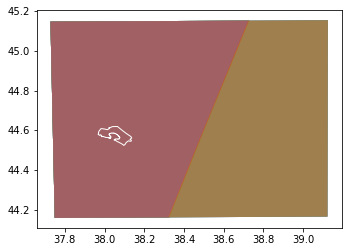

In [26]:
ax=products_gdf_sorted.plot(column='uuid', cmap=None, alpha=0.5)
place.plot(ax=ax, edgecolor="white", facecolor='None')

In [27]:
# this is the scene ID needed to to call download fucntion
uuid=products_gdf_sorted.index.to_list()[0]

In [28]:
# this is the name that will be given by default to a folder in which data will be donloaded
title=products_gdf_sorted.loc[uuid].title

In [71]:
api.download(uuid, directory_path='./imagery')

Downloading: 100%|██████████| 629M/629M [01:23<00:00, 7.57MB/s] 
MD5 checksumming: 100%|██████████| 629M/629M [00:01<00:00, 397MB/s] 


{'id': 'a0355a57-a5eb-452d-a248-0bbdf44f463c',
 'title': 'S2B_MSIL2A_20190916T082559_N0213_R021_T37TDK_20190916T130703',
 'size': 629254856,
 'md5': 'D81389A9DA283099896F26EEEAD287D8',
 'date': datetime.datetime(2019, 9, 16, 8, 25, 59, 24000),
 'footprint': 'POLYGON((38.732885529268415 45.151802429452395,38.679186431583965 45.02150302085845,38.61930826033507 44.87593637992597,38.57165932795098 44.760002139478594,38.55912541155133 44.729568249601456,38.4992968430776 44.58417938183885,38.44122898796999 44.438424680731984,38.41487653936901 44.37213665710643,38.38353548906273 44.293606347130805,38.330670405723524 44.16139035607666,37.74888294664043 44.15851530960486,37.727450341668586 45.14674718783555,38.732885529268415 45.151802429452395))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('a0355a57-a5eb-452d-a248-0bbdf44f463c')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 9, 16, 20, 25, 14, 987000),
 'Ingestion Date': datetime.datetime(2019, 9, 16, 20,

In [72]:
import zipfile
with zipfile.ZipFile(f"imagery/{title}.zip","r") as zip_ref:
    zip_ref.extractall("imagery")

In [144]:
# clean-up
if os.path.exists(f"imagery/{title}.zip"):
    os.remove(f"imagery/{title}.zip")

In [29]:
# there is lots of folders that get downloaded, actual images is in the GRANULE/IMG_DATA
sentinel_folder=os.listdir(os.path.join('imagery', f'{title}.SAFE', 'GRANULE'))[0]

In [30]:
sentinel_folder

'L2A_T37TDK_A013203_20190916T083039'

In [31]:
os.listdir(os.path.join('imagery', f'{title}.SAFE', 'GRANULE', sentinel_folder))

['MTD_TL.xml', 'IMG_DATA', 'QI_DATA', 'AUX_DATA']

In [32]:
# one folder for each of the 13 spectral bands--they are in different resolutions
os.listdir(os.path.join('imagery', f'{title}.SAFE', 'GRANULE', sentinel_folder, 'IMG_DATA'))

['R60m', 'R20m', 'R10m']

In [33]:
folder=os.path.join('imagery', f'{title}.SAFE', 'GRANULE', sentinel_folder, 'IMG_DATA')

In [34]:
os.listdir(folder)

['R60m', 'R20m', 'R10m']

In [35]:
for sub_folder in os.listdir(folder):
    print (f'{sub_folder} :', )
    for file in os.listdir(os.path.join(folder, sub_folder)):
        print (file)

R60m :
T37TDK_20190916T082559_B07_60m.jp2
T37TDK_20190916T082559_B8A_60m.jp2
T37TDK_20190916T082559_WVP_60m.jp2
T37TDK_20190916T082559_TCI_60m.jp2
T37TDK_20190916T082559_B06_60m.jp2
T37TDK_20190916T082559_B04_60m.jp2
T37TDK_20190916T082559_B05_60m.jp2
T37TDK_20190916T082559_AOT_60m.jp2
T37TDK_20190916T082559_B09_60m.jp2
T37TDK_20190916T082559_B01_60m.jp2
T37TDK_20190916T082559_B11_60m.jp2
T37TDK_20190916T082559_SCL_60m.jp2
T37TDK_20190916T082559_B03_60m.jp2
T37TDK_20190916T082559_B02_60m.jp2
T37TDK_20190916T082559_B12_60m.jp2
R20m :
T37TDK_20190916T082559_B06_20m.jp2
T37TDK_20190916T082559_TCI_20m.jp2
T37TDK_20190916T082559_WVP_20m.jp2
T37TDK_20190916T082559_B07_20m.jp2
T37TDK_20190916T082559_B8A_20m.jp2
T37TDK_20190916T082559_AOT_20m.jp2
T37TDK_20190916T082559_B05_20m.jp2
T37TDK_20190916T082559_B04_20m.jp2
T37TDK_20190916T082559_SCL_20m.jp2
T37TDK_20190916T082559_B11_20m.jp2
T37TDK_20190916T082559_B02_20m.jp2
T37TDK_20190916T082559_B12_20m.jp2
T37TDK_20190916T082559_B03_20m.jp2
R10m :

Band designations are found here:

https://www.usgs.gov/centers/eros/science/usgs-eros-archive-sentinel-2?qt-science_center_objects=0#qt-science_center_objects

In [36]:
resolution='R20m'

In [37]:
os.listdir(os.path.join(folder, resolution))

['T37TDK_20190916T082559_B06_20m.jp2',
 'T37TDK_20190916T082559_TCI_20m.jp2',
 'T37TDK_20190916T082559_WVP_20m.jp2',
 'T37TDK_20190916T082559_B07_20m.jp2',
 'T37TDK_20190916T082559_B8A_20m.jp2',
 'T37TDK_20190916T082559_AOT_20m.jp2',
 'T37TDK_20190916T082559_B05_20m.jp2',
 'T37TDK_20190916T082559_B04_20m.jp2',
 'T37TDK_20190916T082559_SCL_20m.jp2',
 'T37TDK_20190916T082559_B11_20m.jp2',
 'T37TDK_20190916T082559_B02_20m.jp2',
 'T37TDK_20190916T082559_B12_20m.jp2',
 'T37TDK_20190916T082559_B03_20m.jp2']

In [38]:
red=[band for band in os.listdir(os.path.join(folder, resolution)) if 'B04' in band][0]
blue=[band for band in os.listdir(os.path.join(folder, resolution)) if 'B02' in band][0]
green=[band for band in os.listdir(os.path.join(folder, resolution)) if 'B03' in band][0]
nir=[band for band in os.listdir(os.path.join(folder, resolution)) if 'B8' in band][0]
band5=[band for band in os.listdir(os.path.join(folder, resolution)) if 'B05' in band][0]
band6=[band for band in os.listdir(os.path.join(folder, resolution)) if 'B06' in band][0]
band7=[band for band in os.listdir(os.path.join(folder, resolution)) if 'B07' in band][0]

In [43]:
# read RGB composite to take a look at what we downloaded
src=rasterio.open(os.path.join(folder, resolution, 'T37TDK_20190916T082559_TCI_20m.jp2'))

In [47]:
data=src.read(1)

In [48]:
src.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 5490,
 'height': 5490,
 'count': 3,
 'crs': CRS.from_epsg(32637),
 'transform': Affine(20.0, 0.0, 399960.0,
        0.0, -20.0, 5000040.0)}

In [49]:
# make GeodataFrame from the area of interest box
geo_box = gpd.GeoDataFrame({'geometry': query_box}, index=[0], crs=place.crs)

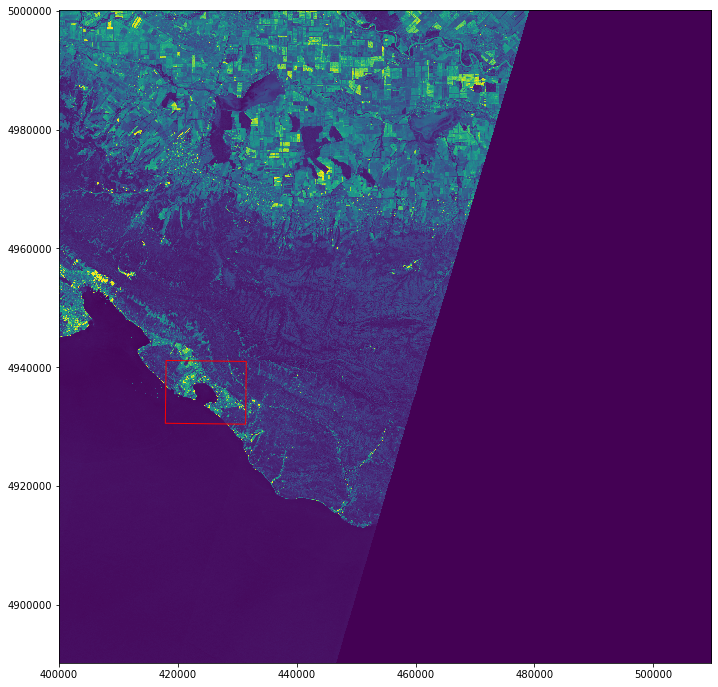

In [55]:
# Vizualize the raster band and the area of interest
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(data, extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
geo_box.to_crs(src.crs).plot(ax=plt.gca(), edgecolor="red", facecolor="none");

In [57]:
def crop_band(clip_gdf, input_folder, band, output_folder, out_name):
    '''Clip raster band to the area of interest and write out clipped raster (in tif format) to the specified folder
    Params:
        clip_gdf (GeodatFrame): Area of interest
        input_folder (str): Folder with raster band
        band (str): Name of the band
        output_folder (str): Folder where clipped features will be stored
        outname (str): Name for the clipped band
    '''
    import json
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # this is how the mask function needs the clip feature to be according to the documentation    
    crop_feature = [json.loads(clip_gdf.to_json())['features'][0]['geometry']]    
    src=rasterio.open(os.path.join(input_folder, band))
    # clip using mask 
    out_image, out_transform=mask(src, crop_feature, crop=True)
    # get the metadata of the original raster to use for the output raster
    out_meta=src.meta.copy()
    # update the width an height since they are now (after clipping) they are
    # different from the original raster's dimensions
    out_meta.update({'height': out_image.shape[1],
                   'width':out_image.shape[2],
                   'transform': out_transform})
    # open the new tif file in the writing mode and write out the clipped raster
    with rasterio.open(f'{output_folder}/{out_name}.tif', 'w', **out_meta) as dest:
        dest.write(out_image)

In [58]:
band_names={red:'red',
            green: 'green',
            blue: 'blue',
            nir: 'nir',
            band5: 'band5',
            band6: 'band6',
            band7: 'band7',
           }

In [60]:
band_names

{'T37TDK_20190916T082559_B04_20m.jp2': 'red',
 'T37TDK_20190916T082559_B03_20m.jp2': 'green',
 'T37TDK_20190916T082559_B02_20m.jp2': 'blue',
 'T37TDK_20190916T082559_B8A_20m.jp2': 'nir',
 'T37TDK_20190916T082559_B05_20m.jp2': 'band5',
 'T37TDK_20190916T082559_B06_20m.jp2': 'band6',
 'T37TDK_20190916T082559_B07_20m.jp2': 'band7'}

In [61]:
# reproject area of interest to same projection as the imagery
geo_box=geo_box.to_crs(src.crs)

In [62]:
os.path.join(folder, resolution)

'imagery/S2B_MSIL2A_20190916T082559_N0213_R021_T37TDK_20190916T130703.SAFE/GRANULE/L2A_T37TDK_A013203_20190916T083039/IMG_DATA/R20m'

In [63]:
for band, name in band_names.items():
    crop_band(clip_gdf=geo_box, 
              input_folder=os.path.join(folder, resolution), 
              band=band, 
              output_folder='clipped',
              out_name=name)

## Some feature generating to add additional dimension
Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs). NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover.

For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have a NDVI value close to +1, there’s a high possibility that it’s dense green leaves.

But when NDVI is close to zero, there isn’t green leaves and it could even be an urbanized area.

https://gisgeography.com/ndvi-normalized-difference-vegetation-index/

$NDVI=\frac{NIR-RED}{NIR+RED}$

In [64]:
# write the function to calculate NDVI
def calculate_ndvi(red, nir):
    ''' Given Red and NIR bands as input, 
    calcuates NDVI'''
    
    # beacase division will unlikely result in integers
    # change the datatype of our arrays from integer to float
    red=red.astype(float)
    nir=nir.astype(float)
    
    # since we have 0 values
    # we need to mask them out, so that they don't participate in the calculations
    masked_red=np.ma.masked_where(red==0, red)
    masked_nir=np.ma.masked_where(nir==0, nir)
    
    # NDVI formula
    ndvi=(masked_nir-masked_red)/(masked_nir+masked_red)
    ndvi=ndvi.filled(fill_value=-1)
    return ndvi

In [65]:
tifs=[tif for tif in os.listdir('./clipped') if tif.endswith('.tif')]

In [66]:
red=rasterio.open(os.path.join('./clipped', 'red.tif')).read(1)
blue=rasterio.open(os.path.join('./clipped', 'blue.tif')).read(1)
green=rasterio.open(os.path.join('./clipped', 'green.tif')).read(1)
nir=rasterio.open(os.path.join('./clipped', 'nir.tif')).read(1)
band5=rasterio.open(os.path.join('./clipped', 'band5.tif')).read(1)
band6=rasterio.open(os.path.join('./clipped', 'band6.tif')).read(1)
band7=rasterio.open(os.path.join('./clipped', 'band7.tif')).read(1)

In [67]:
red.shape

(537, 682)

In [68]:
ndvi=calculate_ndvi(red, nir)

In [79]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

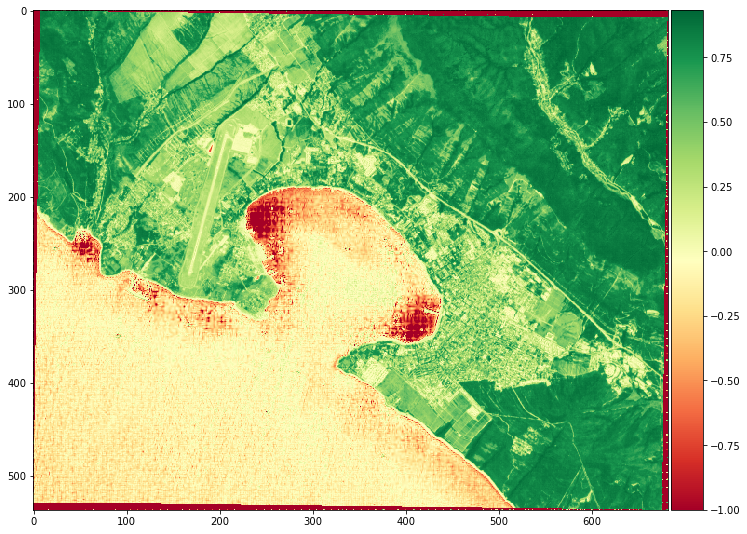

In [81]:
fig, ax = plt.subplots(figsize=(12, 12))
im=plt.imshow(ndvi, cmap=plt.get_cmap('RdYlGn'))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax);

In [100]:
from sklearn import cluster

In [101]:
all_bands=np.dstack([red.ravel(), 
                     green.ravel(),
                     blue.ravel(),
                     nir.ravel(),
                     ndvi.ravel(),
                     band5.ravel(),
                     band6.ravel(),
                     band7.ravel()])

In [102]:
all_bands.shape[1:]

(366234, 8)

In [103]:
X = all_bands.reshape(all_bands.shape[1:])

In [104]:
X.shape

(366234, 8)

In [105]:
k_means = cluster.KMeans(n_clusters=6, random_state=123)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [88]:
X_cluster = k_means.labels_

In [89]:
set(k_means.labels_)

{0, 1, 2, 3, 4, 5}

In [90]:
X_cluster.shape

(366234,)

In [91]:
X_cluster=X_cluster.reshape(red.shape)

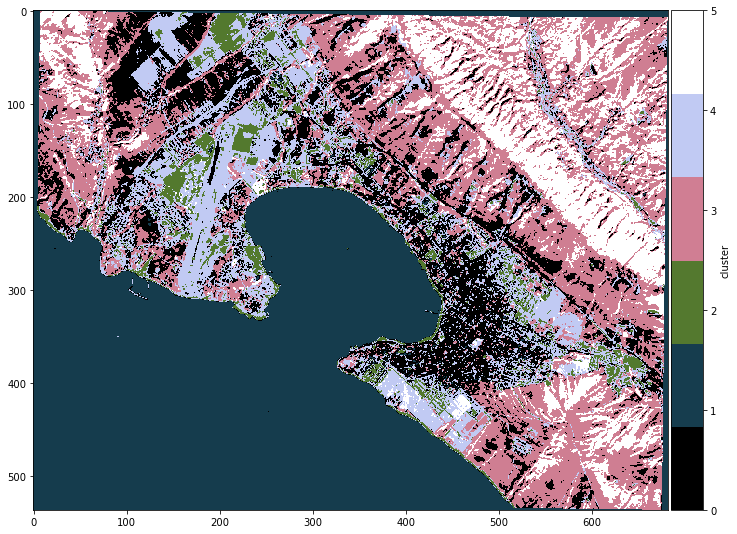

In [94]:
plt.figure(figsize=(12, 12))
ax = plt.gca()
im=plt.imshow(X_cluster, cmap=plt.cm.get_cmap('cubehelix', 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(ticks=range(6), label='cluster', cax=cax)
plt.show()

In [96]:
from PIL import Image

In [97]:
# I used GoogleEarth to label each cluster
# I zoomed into each area for each cluster to give a meaningful cluster label
image=Image.open(os.path.join('./clipped', 'GoogleEarth.png'))

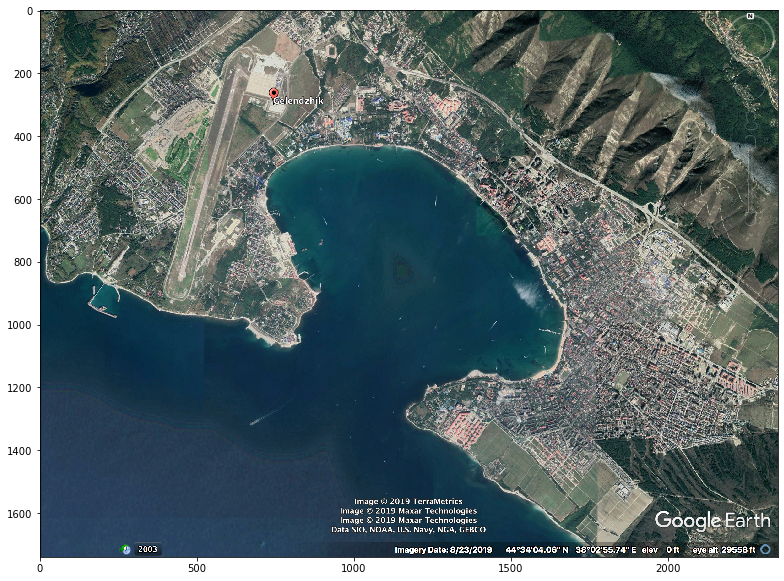

In [99]:
fig, ax = plt.subplots(figsize=(11, 11))
ax.imshow(image, interpolation='nearest')
plt.tight_layout()

In [106]:
labels={
    3: 'trees/dense vegetation',
    1: 'water',
    0: 'residential/roads',
    4: 'grassland',
    2: 'commercial/industrial',
    5: 'sparse vegetaion' ,
}

In [107]:
bands_df=pd.DataFrame(X, columns=['red', 'green', 'blue', 'nir', 'ndvi', 'band5', 'band6', 'band7'])

In [108]:
bands_df['cluster'] = k_means.labels_

In [109]:
bands_df['labels']=bands_df['cluster'].map(labels)

In [110]:
bands_df.sample(20)

red   green    blue     nir      ndvi   band5   band6   band7  \
218002  1233.0  1002.0   914.0  1583.0  0.124290  1374.0  1466.0  1633.0   
184279   463.0   530.0   303.0  2325.0  0.667862   983.0  1766.0  2045.0   
173559    88.0   349.0   399.0    58.0 -0.205479    53.0    57.0    63.0   
344326   304.0   453.0   242.0  2485.0  0.782001   787.0  1886.0  2209.0   
357177    69.0   220.0   281.0    40.0 -0.266055    50.0    31.0    47.0   
273148    78.0   210.0   233.0    66.0 -0.083333    62.0    67.0    74.0   
46979   1116.0   956.0   793.0  1784.0  0.230345  1302.0  1487.0  1751.0   
208844   448.0   547.0   416.0   611.0  0.153919   607.0   464.0   723.0   
241644    61.0   152.0   225.0    54.0 -0.060870    43.0    58.0    49.0   
199393  1545.0  1290.0   991.0  2570.0  0.249089  1982.0  2157.0  2391.0   
306152   429.0   688.0   335.0  4003.0  0.806408  1356.0  3017.0  3578.0   
169050   300.0   464.0   293.0  3421.0  0.838753   872.0  2417.0  2944.0   
4248    1649.0  1241.0   934.0  2663.0  0.235158  1978.0  2196.0  2363.0   
184703   162.0   290.0   134.0  2092.0  0.856256   598.0  1552.0  1888.0   
42157    273.0   482.0   188.0  3472.0  0.854206   984.0  2589.0  3126.0   
73958   1853.0  1802.0  1618.0  2189.0  0.083127  1918.0  2121.0  2143.0   
40966    222.0   395.0   198.0  2778.0  0.852000   778.0  2038.0  2499.0   
245152    41.0   159.0   222.0    33.0 -0.108108    38.0    39.0    46.0   
335055    52.0   140.0   218.0    49.0 -0.029703    47.0    48.0    55.0   
49604    426.0   533.0   282.0  2922.0  0.745520  1075.0  2142.0  2437.0   

        cluster                  labels  
218002        0       residential/roads  
184279        3  trees/dense vegetation  
173559        1                   water  
344326        3  trees/dense vegetation  
357177        1                   water  
273148        1                   water  
46979         0       residential/roads  
208844        1                   water  
241644        1                   water  
199393        4               grassland  
306152        5        sparse vegetaion  
169050        5        sparse vegetaion  
4248          4               grassland  
184703        0       residential/roads  
42157         5        sparse vegetaion  
73958         2   commercial/industrial  
40966         3  trees/dense vegetation  
245152        1                   water  
335055        1                   water  
49604         3  trees/dense vegetation

In [111]:
import seaborn as sns

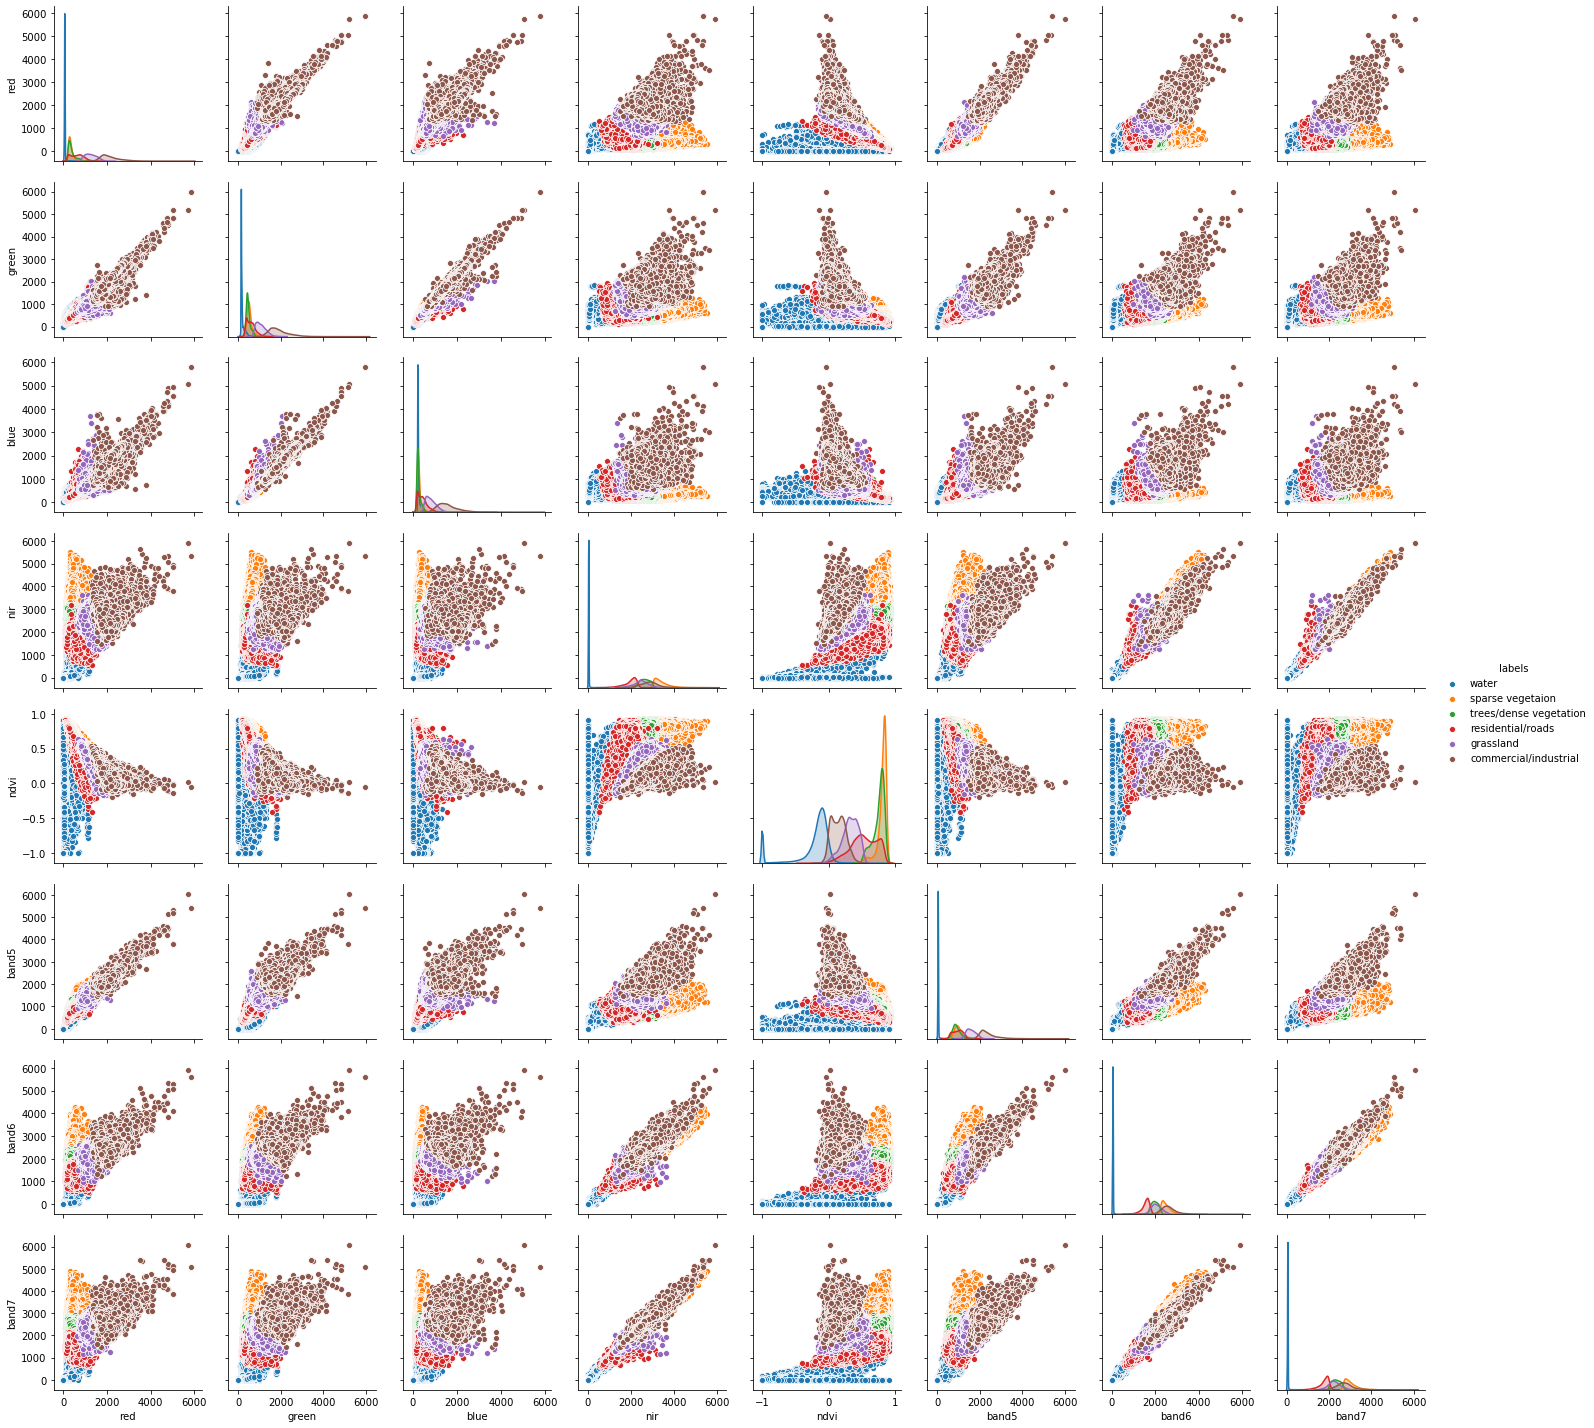

In [112]:
sns.pairplot(bands_df.drop('cluster', 1), hue="labels")
plt.show()

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [114]:
X_bands=bands_df.drop(['labels', 'cluster'], 1)

In [115]:
y=bands_df.cluster

In [116]:
ss=StandardScaler()

In [117]:
Xs = ss.fit_transform(X_bands)

In [119]:
X_train, X_test, y_train, y_test=train_test_split(Xs, y)

In [120]:
grid_params={'n_neighbors': list(range(3, 50, 4)),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan']    
}

In [121]:
gs=GridSearchCV(KNeighborsClassifier(),
                grid_params,
                verbose=1,
                cv=3,
                n_jobs=-1
               )

In [ ]:
gs_results=gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min


In [ ]:
gs_results.best_score_

In [ ]:
gs_results.best_params_

In [ ]:
# now train the model using the best parameters returned by Gridsearch
optimal_knn=KNeighborsClassifier(n_neighbors=gs_results.best_params_['n_neighbors'],
                        weights=gs_results.best_params_['weights'],
                        metric=gs_results.best_params_['metric'])

In [ ]:
optimal_knn.fit(X_train, y_train)

In [ ]:
y_pred=optimal_knn.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
# baseline accurace
y.value_counts() / y.count()

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
import joblib

In [ ]:
joblib.dump(optimal_knn, 'KNeighborsClassifier_LandCover.pkl') 

In [ ]:
pwd

In [ ]:
ls